In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection

In [3]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train_nohe.npy', allow_pickle = True)
y_test = np.load('../data/y_test_nohe.npy', allow_pickle = True)

In [4]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289,)
shape of Y_test:  (60232,)


In [5]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X_trainhpt = X_train[10000:]
y_trainhpt = y_train[10000:]

In [15]:
## Hyperparameter tuning for adaboost

algorithm = ['SAMME', 'SAMME.R']
base_estimator = [DecisionTreeClassifier(max_depth=1)]
learning_rate = [0.1, 0.5, 1.0, 1.5, 2.0]
n_estimators = [50, 100, 150, 200, 250]
random_state = [42]

In [16]:
random_grid = {'algorithm': algorithm,
               'base_estimator': base_estimator,
               'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'random_state': random_state}

from sklearn.model_selection import RandomizedSearchCV

rf = AdaBoostClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [17]:
rf_random.fit(X_trainhpt, y_trainhpt)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [8]:
##adaboost classifier for y_train one hot encoded data

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)


In [ ]:
ada_clf.fit(X_train, y_train)

In [9]:
# load model
filename = 'AdaBoost.sav'
ada_clf = pickle.load(open(filename, 'rb'))

c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.1.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
y_pred = ada_clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.5153543528353847


In [11]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[ 6948  1174  3361  5744 18359]
 [  546 16624    80  1242 17094]
 [ 1153    29 31081   945  2378]
 [  376   493  3224 20162 11331]
 [ 3915  1588  2944 10257 16882]]


In [12]:
print("Classification Report: ", classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.54      0.20      0.29     35586
           1       0.84      0.47      0.60     35586
           2       0.76      0.87      0.81     35586
           3       0.53      0.57      0.55     35586
           4       0.26      0.47      0.33     35586

    accuracy                           0.52    177930
   macro avg       0.58      0.52      0.52    177930
weighted avg       0.58      0.52      0.52    177930



In [13]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average = 'weighted',zero_division = 0),
           'recall' : make_scorer(recall_score, average = 'weighted',zero_division = 0), 
           'f1_score' : make_scorer(f1_score, average = 'weighted',zero_division = 0)}
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_validate(estimator=xgb_clf,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold,
                                          scoring=scoring)
print('Accuracy: %.3f (%.3f)' % (np.mean(results['test_accuracy']), np.std(results['test_accuracy'])))
print('Precision: %.3f (%.3f)' % (np.mean(results['test_precision']), np.std(results['test_precision'])))
print('Recall: %.3f (%.3f)' % (np.mean(results['test_recall']), np.std(results['test_recall'])))
print('F1_score: %.3f (%.3f)' % (np.mean(results['test_f1_score']), np.std(results['test_f1_score'])))

Accuracy: 0.699 (0.162)
Precision: 0.857 (0.160)
Recall: 0.699 (0.162)
F1_score: 0.752 (0.174)


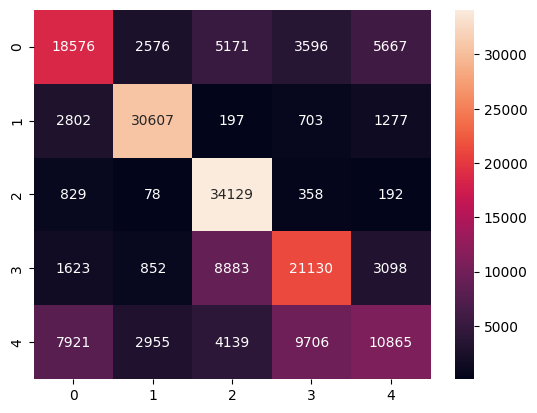

In [11]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
